In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv(r"openpowerlifting.csv")
df.head()

C:\Users\austi\AppData\Roaming\Python\Python38\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (33,35,38) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Name,Sex,Event,Equipment,Age,AgeClass,BirthYearClass,Division,BodyweightKg,WeightClassKg,...,Tested,Country,State,Federation,ParentFederation,Date,MeetCountry,MeetState,MeetTown,MeetName
0,Dominik Gabriel,M,B,Raw,17.0,16-17,14-18,T 16-17,102.5,110,...,NaN,Slovakia,NaN,WUAP,WUAP,2015-06-16,Czechia,NaN,Praha,European Championships
1,Marek Herák,M,B,Multi-ply,19.0,18-19,19-23,T 18-19,59.8,60,...,NaN,Slovakia,NaN,WUAP,WUAP,2015-06-16,Czechia,NaN,Praha,European Championships
2,Miroslav Adamove,M,B,Multi-ply,18.0,18-19,14-18,T 18-19,87.7,90,...,NaN,Slovakia,NaN,WUAP,WUAP,2015-06-16,Czechia,NaN,Praha,European Championships
3,Kamil Lipiňski,M,B,Multi-ply,19.0,18-19,19-23,T 18-19,89.5,90,...,NaN,Poland,NaN,WUAP,WUAP,2015-06-16,Czechia,NaN,Praha,European Championships
4,Gabriel Kováč,M,B,Multi-ply,20.0,20-23,19-23,Juniors,81.6,82.5,...,NaN,Slovakia,NaN,WUAP,WUAP,2015-06-16,Czechia,NaN,Praha,European Championships


In [4]:
df.Equipment.unique()

array(['Raw', 'Multi-ply', 'Single-ply', 'Wraps', 'Unlimited', 'Straps'],
      dtype=object)

In [5]:
df = df.drop(df[df.Equipment == 'Straps'].index.tolist()) #drop straps - mainly exhibition, not actual meets

In [6]:
#examine null values
for c in df.columns:
    na_count = df[c].isna().sum()
    if na_count > 0:
        na_percent = round(na_count/len(df)*100, 1)
        print(f'{c} has {na_count} nulls, which is {na_percent}% of the dataset')

Age has 902276 nulls, which is 38.9% of the dataset
AgeClass has 690405 nulls, which is 29.7% of the dataset
BirthYearClass has 847866 nulls, which is 36.5% of the dataset
Division has 2391 nulls, which is 0.1% of the dataset
BodyweightKg has 29745 nulls, which is 1.3% of the dataset
WeightClassKg has 26000 nulls, which is 1.1% of the dataset
Squat1Kg has 1771987 nulls, which is 76.3% of the dataset
Squat2Kg has 1778472 nulls, which is 76.6% of the dataset
Squat3Kg has 1794618 nulls, which is 77.3% of the dataset
Squat4Kg has 2315760 nulls, which is 99.7% of the dataset
Best3SquatKg has 797359 nulls, which is 34.3% of the dataset
Bench1Kg has 1397876 nulls, which is 60.2% of the dataset
Bench2Kg has 1409425 nulls, which is 60.7% of the dataset
Bench3Kg has 1439481 nulls, which is 62.0% of the dataset
Bench4Kg has 2305301 nulls, which is 99.3% of the dataset
Best3BenchKg has 284148 nulls, which is 12.2% of the dataset
Deadlift1Kg has 1690811 nulls, which is 72.8% of the dataset
Deadlift

In [7]:
#drop attempts and keeping only the best lifts
df=df.drop(['Squat1Kg', 'Squat2Kg', 'Squat3Kg', 'Squat4Kg','Bench1Kg', 'Bench2Kg', 'Bench3Kg', 'Bench4Kg',
           'Deadlift1Kg', 'Deadlift2Kg', 'Deadlift3Kg', 'Deadlift4Kg'], axis=1)

Drop rows with neagtive best lifts. A negative number means the lifter failed all three of their attempts. These are not representative of the actual ability of the lifters and can significantly skew the data.

In [8]:
neg_best = np.where((df.Best3SquatKg <0) | (df.Best3BenchKg <0) | (df.Best3DeadliftKg <0))
df_neg_best = df.loc[neg_best]
df = df.drop(df.index[df_neg_best.index.tolist()]) #remove rows with negatives - failed lifts
df_neg_best.shape

(6482, 29)

In [9]:
df.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,Age,BodyweightKg,Best3SquatKg,Best3BenchKg,Best3DeadliftKg,TotalKg,Dots,Wilks,Glossbrenner,Goodlift
count,1413718.000000,2285562.000000,1518997.000000,2033354.000000,1648550.000000,2156214.000000,2136619.000000,2136619.000000,2136619.000000,1946599.000000
mean,30.936621,84.009855,175.534435,119.685659,189.513881,375.285977,272.988844,272.008906,256.512513,63.861166
std,13.173145,22.718617,68.092617,53.809770,61.678284,206.987236,130.308972,129.819409,123.478453,16.213174
min,0.000000,15.100000,1.000000,1.000000,1.000000,1.000000,0.680000,0.670000,0.640000,0.500000
25%,20.500000,67.040000,122.500000,77.110000,140.000000,200.000000,140.430000,139.870000,132.540000,52.140000
50%,27.500000,81.920000,170.000000,115.670000,190.000000,349.270000,293.670000,292.800000,273.370000,63.580000
75%,39.000000,98.880000,220.000000,154.220000,235.000000,530.700000,371.490000,370.020000,350.455000,75.140000
max,98.000000,260.200000,581.050000,503.490000,460.400000,1407.500000,795.220000,793.330000,756.900000,146.490000


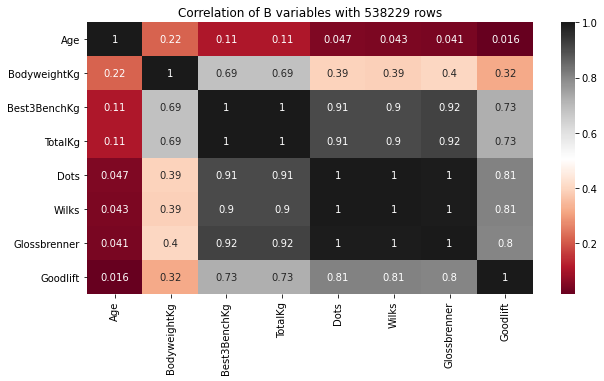

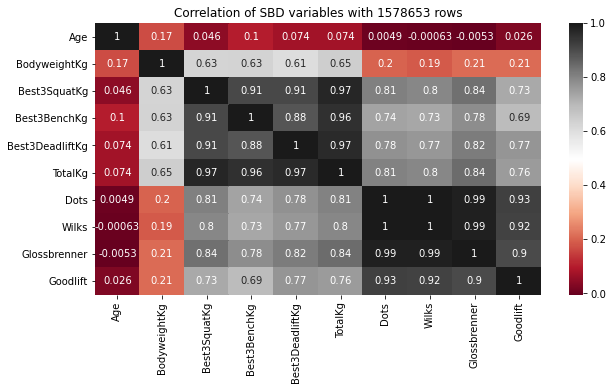

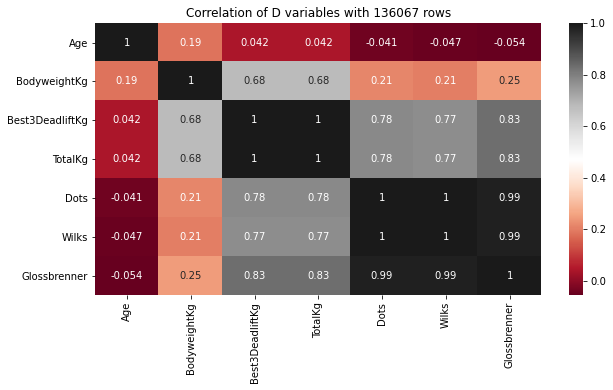

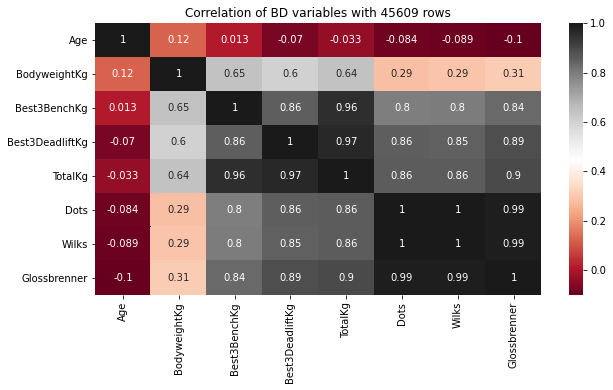

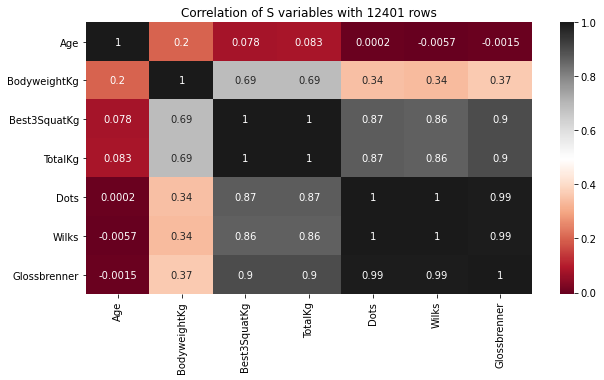

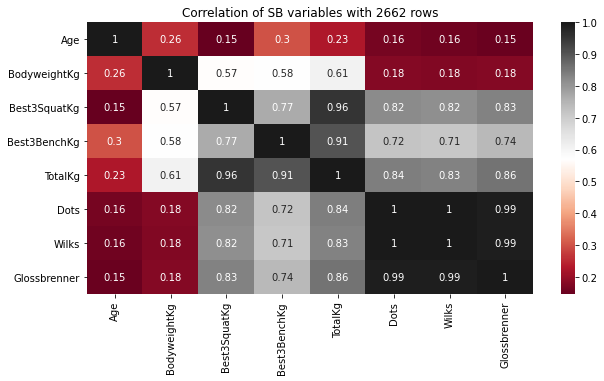

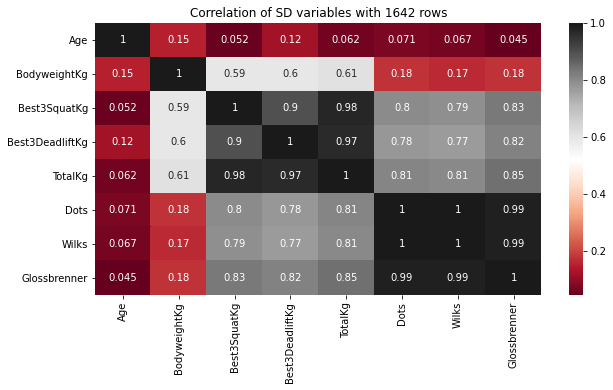

In [10]:
#split dataset by event type
def event_df(event,df=df):
    data = df[df.Event == event]
    return data

#plot correlation matrix for each event type
for e in df.Event.unique():
    data = event_df(e).dropna(axis=1, how='all')
    vars()[e] = data #set df name to event type
    plt.figure(figsize=(10,5))
    cor = data.corr()
    sns.heatmap(cor, annot=True, cmap=plt.cm.RdGy)
    plt.title(f'Correlation of {e} variables with {len(data)} rows')
    plt.show()

The correlations across variables are nearly identical across all types of events. We will focus on the SBD event as it is the most common and also includes all three lifts (Squat, Bench, Deadlift).

In [11]:
def plot_hist(lift, data=SBD):
    df_m=data[data.Sex == 'M']
    df_f=data[data.Sex == 'F']
    
    plt.style.use('seaborn-deep')
    fig, ax = plt.subplots(figsize = (9,4))
    
    for d,c in zip([df_m, df_f],['#6E69B5','#C9253A']):
        
        #Freedman-Diaconis rule optimal number of bins
        bin_width = 2*(d[lift].quantile(0.75) - d[lift].quantile(0.25))*len(d[lift])**(-1/3)
        bins = round((d[lift].max() - d[lift].min())/bin_width) 
        
        #I reduced the number of bins by half to make it more visually appealing
        plt.hist(d[lift].dropna(), bins = int(bins/2), label=d['Sex'].iloc[0], color = c) 
    
    ax.set_title(lift, fontsize=15)
    ax.set_facecolor('#b3bdc6')
    ax.legend()
    plt.show()

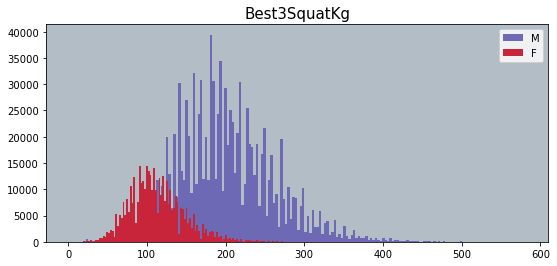

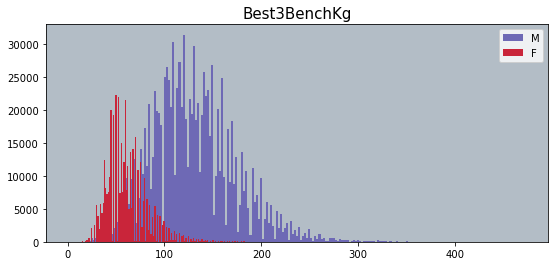

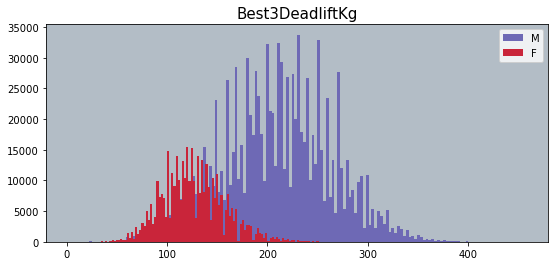

In [12]:
for l in ['Best3SquatKg', 'Best3BenchKg','Best3DeadliftKg']:
    plot_hist(l)

Some powerlifting meets allow the use of equipment. Equipment generally provides extra support to the lifter, allowing them to lift slighly heavier. We can compare the mean, median and distribution of each lift between the equipment types.

In [16]:
from matplotlib import gridspec

sbd_m=SBD[SBD.Sex == 'M']
sbd_f=SBD[SBD.Sex == 'F']

def equip_mean(data):
    avg_lift = data.groupby(by=['Equipment']).mean()
    fig = plt.figure(figsize=(24,12))
    gs = gridspec.GridSpec(nrows=2, ncols=3)
    for l,n in zip(['Best3SquatKg', 'Best3BenchKg','Best3DeadliftKg'], range(3)):
        ax= plt.subplot(gs[n])
        sns.barplot(y=avg_lift[l], x=avg_lift.index, ax=ax, palette= 'Accent')
        ax.set_facecolor('#2E2A34')
        ax.set_title(f'Mean {l} by Equipment Type', fontsize=12, fontweight='bold')

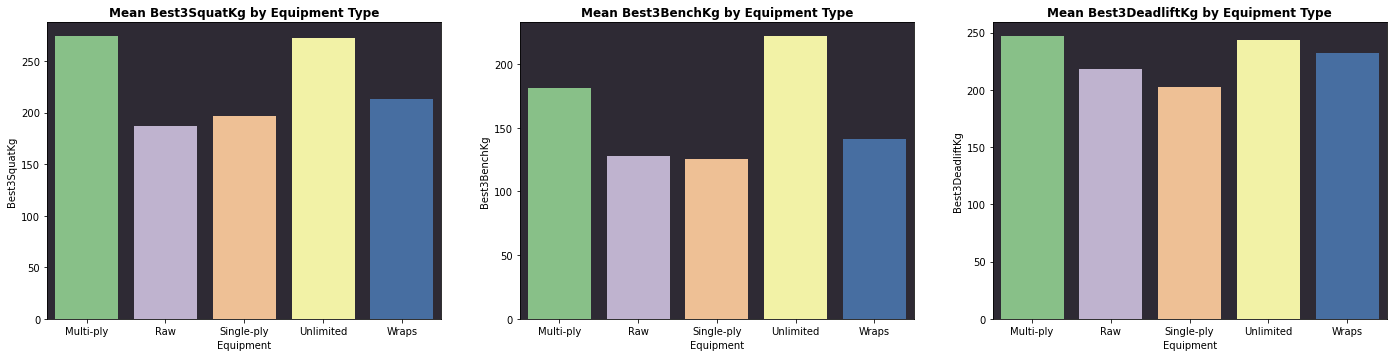

In [17]:
equip_mean(sbd_m)

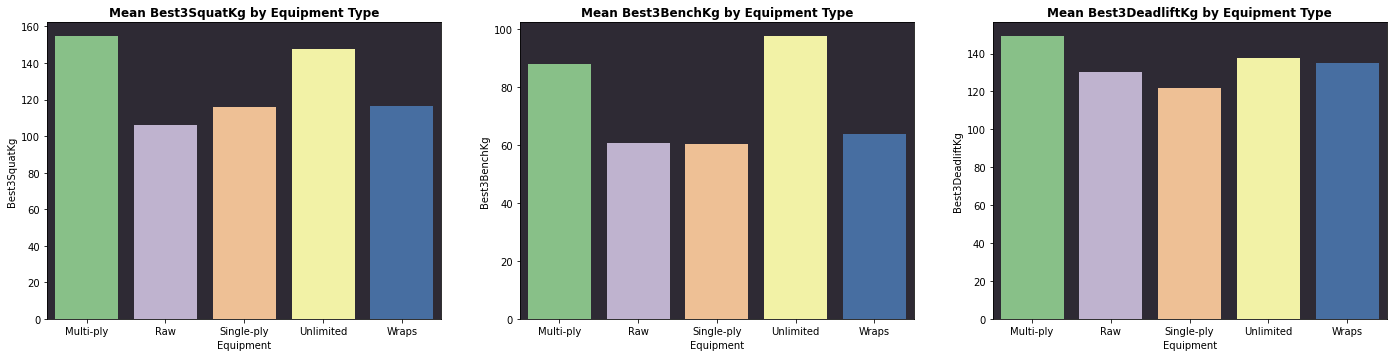

In [18]:
equip_mean(sbd_f)

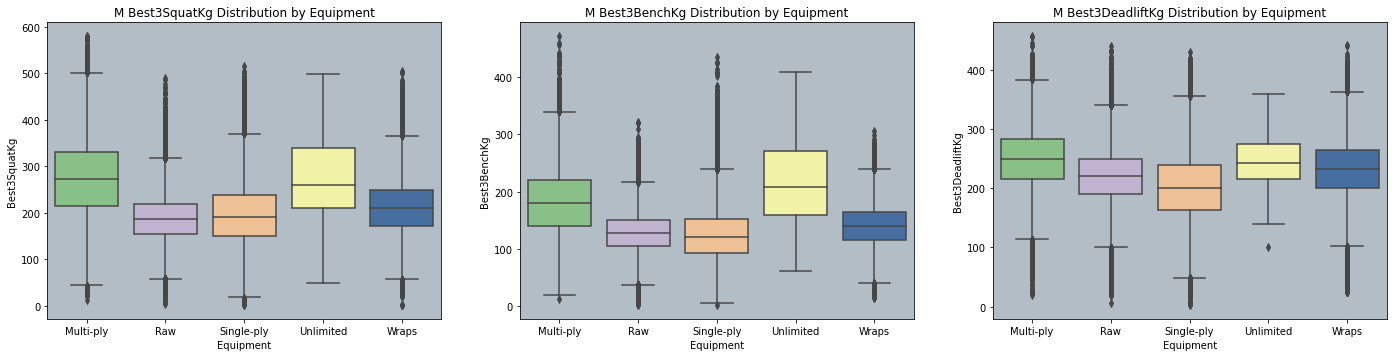

In [21]:
def plot_box(data):
    plt.style.use('seaborn-deep')
    fig = plt.figure(figsize=(24,12))
    gs = gridspec.GridSpec(nrows=2, ncols=3)
    for l,n in zip(['Best3SquatKg', 'Best3BenchKg','Best3DeadliftKg'], range(3)):
        ax=plt.subplot(gs[n])
        ax = sns.boxplot(data=data.sort_values('Equipment'), x= 'Equipment', y= l, palette= 'Accent')
        ax.set_title(f'{data.Sex.iloc[0]} {l} Distribution by Equipment')
        ax.set_facecolor('#b3bdc6')

plot_box(sbd_m)

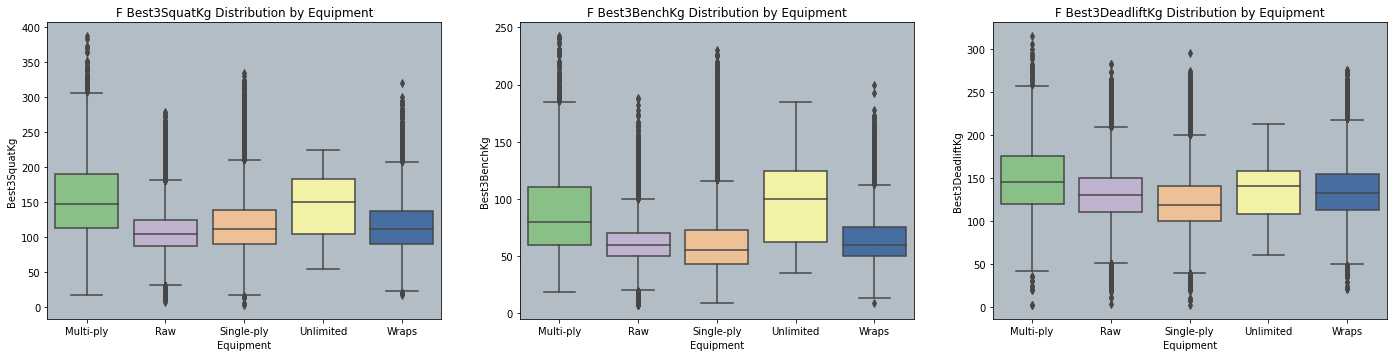

In [22]:
plot_box(sbd_f)

Multi-ply and Unlimited equipment seem to have similar means and medians across the three lifts. Wraps, Raw, and Single-ply look to be similar among each other. Next we can compare the two groups of equipment to determine if more equipment in a powerlifting meet makes a statistically significant difference.

In [23]:
equip_map = {
    'Multi-ply': 'Heavy',
    'Unlimited': 'Heavy',
    'Wraps': 'Light/Raw',
    'Single-ply': 'Light/Raw',
    'Raw': 'Light/Raw'
}

sbd_m['Equip group'] = sbd_m['Equipment'].apply(equip_map.get)
sbd_f['Equip group'] = sbd_f['Equipment'].apply(equip_map.get)

<ipython-input-23-1e799646e12f>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sbd_m['Equip group'] = sbd_m['Equipment'].apply(equip_map.get)
<ipython-input-23-1e799646e12f>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sbd_f['Equip group'] = sbd_f['Equipment'].apply(equip_map.get)


In [32]:
from scipy import stats

def t_test(data): 
    d_heavy = data[data['Equip group']=='Heavy']
    d_light = data[data['Equip group']=='Light/Raw']
    
    for lift in ['Best3SquatKg', 'Best3BenchKg','Best3DeadliftKg']:
        N = 10000
        h = d_heavy[lift].sample(n=N, random_state=1, replace=True)
        l = d_light[lift].sample(n=N, random_state=1, replace=True)
        var_h = h.var(ddof=1)
        var_l = l.var(ddof=1)
        
        #std deviation
        s = np.sqrt((var_h + var_l)/2)
        print(f'The standard deviation of the difference of {lift} between the two groups is: {s}')
        
        ## Calculate the t-statistics
        t = (h.mean() - l.mean())/(s*np.sqrt(2/N))
        
        ## Compare with the critical t-value
        #Degrees of freedom
        deg = 2*N - 2
        
        #p-value
        p = 1 - stats.t.cdf(t,df=deg)

        print("t = " + str(t))
        print(f"p = {2*p}")
        
        if p < 0.05:
            print('There is a statistically significant difference between the means of the heavy and light groups.\n')
        else:
            print('There is no significant difference between the means.\n')

In [33]:
t_test(sbd_m)

The standard deviation of the difference of Best3SquatKg between the two groups is: 73.49224938239858
t = 75.2103142056387
p = 0.0
There is a statistically significant difference between the means of the heavy and light groups.

The standard deviation of the difference of Best3BenchKg between the two groups is: 52.21782432699571
t = 72.92752460763579
p = 0.0
There is a statistically significant difference between the means of the heavy and light groups.

The standard deviation of the difference of Best3DeadliftKg between the two groups is: 53.50819653944793
t = 49.210216086695894
p = 0.0
There is a statistically significant difference between the means of the heavy and light groups.



In [34]:
t_test(sbd_f)

The standard deviation of the difference of Best3SquatKg between the two groups is: 48.14177298726243
t = 61.711862833733576
p = 0.0
There is a statistically significant difference between the means of the heavy and light groups.

The standard deviation of the difference of Best3BenchKg between the two groups is: 29.834880818149983
t = 64.02269163807428
p = 0.0
There is a statistically significant difference between the means of the heavy and light groups.

The standard deviation of the difference of Best3DeadliftKg between the two groups is: 35.40233299849438
t = 46.00366302346623
p = 0.0
There is a statistically significant difference between the means of the heavy and light groups.



Across all the lifts for both male and female datasets, there is a statstically significant difference between the heavy and light equipment groups, as shown with a small p-value (under 0.05).